# Reweighting study for Mono-s(WW) search

**Aim of the study**: Check if reweighting samples on particle level is possible.
The basis for the study are three files with scale factors that were derived on parton level (i.e. just using MadGraph). They contain scale factors for reweighting samples with constant dark matter mass of 200 GeV, constant dark Higgs mass of 160 GeV and varied Z' mass of 

- 1500 GeV reweighted to 2000 GeV
- 1500 GeV reweighted to 2500 GeV
- 2000 GeV reweighted to 2500 GeV

Then on particle level (i.e. MadGraph + Pythia) using samples generated with no real corrections (i.e. no additional jets from the matrix element), the reweighting based on missing transverse momentum is studied.

## General setup

In [1]:
import os
import numpy as np
from rootpy.io import root_open
from root_numpy import root2array
from histbook import *
from vega import VegaLite as canvas
from IPython.display import HTML

Welcome to JupyROOT 6.12/06


In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
# reweighting histogram files
filepath_reweight_MZp_1p5_to_2p0 = os.path.join('sig_reweight_MDM_200_Ms_160_MZp_1p5_to_2p0.root')
filepath_reweight_MZp_1p5_to_2p5 = os.path.join('sig_reweight_MDM_200_Ms_160_MZp_1p5_to_2p5.root')
filepath_reweight_MZp_2p0_to_2p5 = os.path.join('sig_reweight_MDM_200_Ms_160_MZp_2p0_to_2p5.root')

m_reweight_MZp_1p5_to_2p0 = root_open(filepath_reweight_MZp_1p5_to_2p0, 'read')
m_reweight_MZp_1p5_to_2p5 = root_open(filepath_reweight_MZp_1p5_to_2p5, 'read')
m_reweight_MZp_2p0_to_2p5 = root_open(filepath_reweight_MZp_2p0_to_2p5, 'read')

def getSF(rwfile, histogram, value1, value2=0):
    reweightingHisto = rwfile.Get(histogram)
    return reweightingHisto.GetBinContent(reweightingHisto.FindBin(value1, value2))
m_reweight_MZp_1p5_to_2p0.ls()

TFile**		sig_reweight_MDM_200_Ms_160_MZp_1p5_to_2p0.root	
 TFile*		sig_reweight_MDM_200_Ms_160_MZp_1p5_to_2p0.root	
  KEY: TH1D	hMET_SF;1	
  KEY: TH1D	hJet1Pt_SF;1	
  KEY: TH1D	hJet2Pt_SF;1	
  KEY: TH2D	hMETvJet1Pt_SF;1	
  KEY: TH2D	hMETvJet2Pt_SF;1	


In [4]:
# input files containing trees
filepath_MZp_1p5_to_2p0 = os.path.join('MDM_200_Ms_160_MZp_1p5_to_2p0.root')
filepath_MZp_1p5_to_2p5 = os.path.join('MDM_200_Ms_160_MZp_1p5_to_2p5.root')
filepath_MZp_2p0_to_2p5 = os.path.join('MDM_200_Ms_160_MZp_2p0_to_2p5.root')
filepath_MZp_2p5 = os.path.join('MDM_200_Ms_160_MZp_2p5.root')
# convert trees to numpy arrays
treename = 'TruthMonoS_Nominal'
branches = ['TruthMET_met', 'LeadingJetPt']
arr_MZp1p5 = root2array(filepath_MZp_1p5_to_2p0, treename, branches=branches)
arr_MZp2p0 = root2array(filepath_MZp_2p0_to_2p5, treename, branches=branches)
arr_MZp2p5 = root2array(filepath_MZp_2p5, treename, branches=branches)

## MET based reweighting

In [5]:
histogram = Hist(bin("MET", 20, 0, 1000), groupby('type'))
histogram.fill(MET=arr_MZp1p5['TruthMET_met']*0.001, type="MZP1500")
histogram.fill(MET=arr_MZp2p0['TruthMET_met']*0.001, type="MZP2000")
histogram.fill(MET=arr_MZp2p5['TruthMET_met']*0.001, type="MZP2500")

For each sample there are 10.000 events.

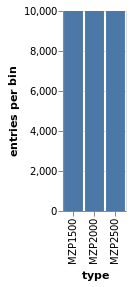

In [6]:
histogram.step("type")

These are the un-reweighted MET distributions:

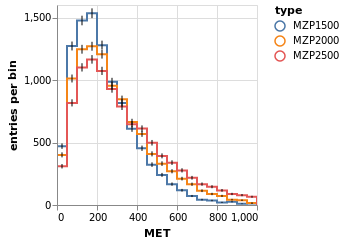

In [7]:
histogram.overlay("type").step("MET", error=True)

### Reweighting from Z' mass of 1500 GeV to 2000 GeV 
Now we are trying to reweight the sample with Z' mass of 1500 GeV to Z' mass of 2000 GeV.
We first plot the **MET** distributions (in GeV) for the 1500 "start" sample, the simulated 2000 "target" sample and the reweighted sample. 

Since by reweighting in MET by definition the simulated and the re-weighted distributions should agree, also the leading jet pt distribution **JETPT1** (in GeV) is shown for the three samples mentioned above.

As excpected, the agreement between reweighted and simulated sample is quite good for the **MET** distribution. However for the **JETPT1** distribution there are smaller differences in the lower part around 100 GeV of the distribution. 

In [8]:
weights_MZp1500to2000 = np.array([getSF(m_reweight_MZp_1p5_to_2p0, 'hMET_SF', value) for value in arr_MZp1p5['TruthMET_met']*0.001])

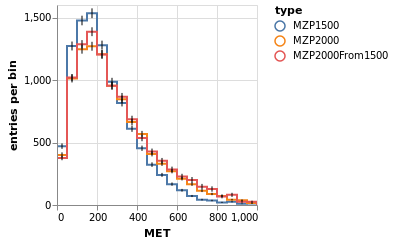

In [9]:
variable = 'TruthMET_met'
histogram = Hist(bin("MET", 20, 0, 1000), groupby('type'), weight="w")
histogram.fill(MET=arr_MZp1p5[variable]*0.001, type="MZP1500", w=np.ones(10000))
histogram.fill(MET=arr_MZp2p0[variable]*0.001, type="MZP2000", w=np.ones(10000))
histogram.fill(MET=arr_MZp1p5[variable]*0.001, w=weights_MZp1500to2000, type="MZP2000From1500")
histogram.overlay("type").step("MET", error=True)

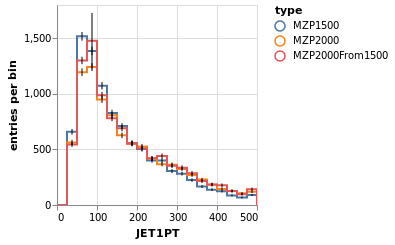

In [10]:
variable = 'LeadingJetPt'
histogram = Hist(bin("JET1PT", 20, 0, 500), groupby('type'), weight="w")
histogram.fill(JET1PT=arr_MZp1p5[variable]*0.001, type="MZP1500", w=np.ones(10000))
histogram.fill(JET1PT=arr_MZp2p0[variable]*0.001, type="MZP2000", w=np.ones(10000))
histogram.fill(JET1PT=arr_MZp1p5[variable]*0.001, w=weights_MZp1500to2000, type="MZP2000From1500")
histogram.overlay("type").step("JET1PT", error=True)

### Reweighting from Z' mass of 1500 GeV to 2500 GeV 
Now we are trying to reweight the sample with Z' mass of 1500 GeV to Z' mass of 2500 GeV.

As above we first plot the **MET** distributions (in GeV) for the 1500 "start" sample, the simulated 2500 "target" sample and the reweighted sample. 

Since by reweighting in MET by definition the simulated and the re-weighted distributions should agree, also the leading jet pt distribution **JETPT1** (in GeV) is shown for the three samples mentioned above.

The agreement between the simulated and reweighted sample is quite good for the **MET** distributions, however in the lower part of the **JETPT1** distribution there are some non-negligible differences.

In [11]:
weights_MZp1500to2500 = np.array([getSF(m_reweight_MZp_1p5_to_2p5, 'hMET_SF', value) for value in arr_MZp1p5['TruthMET_met']*0.001])

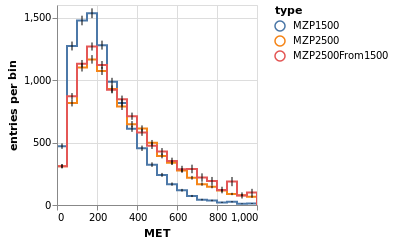

In [12]:
variable = 'TruthMET_met'
histogram = Hist(bin("MET", 20, 0, 1000), groupby('type'), weight="w")
histogram.fill(MET=arr_MZp1p5[variable]*0.001, type="MZP1500", w=np.ones(10000))
histogram.fill(MET=arr_MZp2p5[variable]*0.001, type="MZP2500", w=np.ones(10000))
histogram.fill(MET=arr_MZp1p5[variable]*0.001, w=weights_MZp1500to2500, type="MZP2500From1500")
histogram.overlay("type").step("MET", error=True)

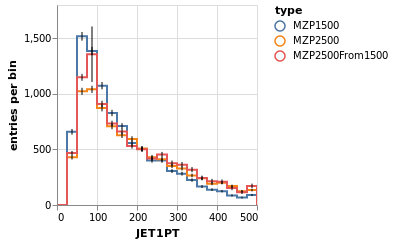

In [13]:
variable = 'LeadingJetPt'
histogram = Hist(bin("JET1PT", 20, 0, 500), groupby('type'), weight="w")
histogram.fill(JET1PT=arr_MZp1p5[variable]*0.001, type="MZP1500", w=np.ones(10000))
histogram.fill(JET1PT=arr_MZp2p5[variable]*0.001, type="MZP2500", w=np.ones(10000))
histogram.fill(JET1PT=arr_MZp1p5[variable]*0.001, w=weights_MZp1500to2500, type="MZP2500From1500")
histogram.overlay("type").step("JET1PT", error=True)

### Reweighting from Z' mass of 2000 GeV to 2500 GeV 
Now we are trying to reweight the sample with Z' mass of 2000 GeV to Z' mass of 2500 GeV.

As above we first plot the **MET** distributions (in GeV) for the 2000 "start" sample, the simulated 2500 "target" sample and the reweighted sample. 

Since by reweighting in MET by definition the simulated and the re-weighted distributions should agree, also the leading jet pt distribution **JETPT1** (in GeV) is shown for the three samples mentioned above.

Except two outliers in the reweighted **JETPT1** distribution, the agreement is quite good both in **MET** and **JETPT1**. The fact that the agreement between simulation and reweighting is better for reweighting from 2000 GeV to 2500 GeV than for reweighting from 1500 GeV to 2000 GeV could be because of the larger kinematic differences for a larger difference in Z' mass.

In [14]:
weights_MZp2000to2500 = np.array([getSF(m_reweight_MZp_2p0_to_2p5, 'hMET_SF', value) for value in arr_MZp2p0['TruthMET_met']*0.001])

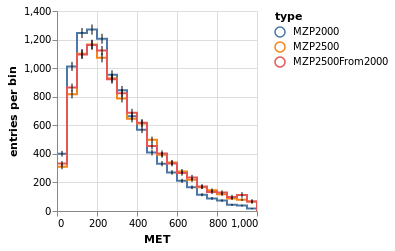

In [15]:
variable = 'TruthMET_met'
histogram = Hist(bin("MET", 20, 0, 1000), groupby('type'), weight="w")
histogram.fill(MET=arr_MZp2p0[variable]*0.001, type="MZP2000", w=np.ones(10000))
histogram.fill(MET=arr_MZp2p5[variable]*0.001, type="MZP2500", w=np.ones(10000))
histogram.fill(MET=arr_MZp2p0[variable]*0.001, w=weights_MZp2000to2500, type="MZP2500From2000")
histogram.overlay("type").step("MET", error=True)

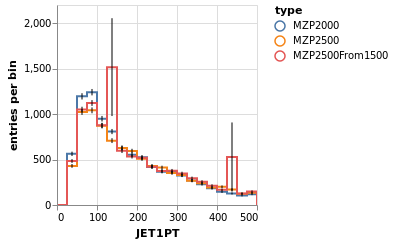

In [16]:
variable = 'LeadingJetPt'
histogram = Hist(bin("JET1PT", 20, 0, 500), groupby('type'), weight="w")
histogram.fill(JET1PT=arr_MZp2p0[variable]*0.001, type="MZP2000", w=np.ones(10000))
histogram.fill(JET1PT=arr_MZp2p5[variable]*0.001, type="MZP2500", w=np.ones(10000))
histogram.fill(JET1PT=arr_MZp2p0[variable]*0.001, w=weights_MZp2000to2500, type="MZP2500From1500")
histogram.overlay("type").step("JET1PT", error=True)

## JETPT1 based reweighting
In addition to the reweighting strategy discussed above, a second strategy based on a reweighting in JETPT1 is presented.

### Reweighting from Z' mass of 1500 GeV to 2000 GeV 
Now we are trying to reweight the sample with Z' mass of 1500 GeV to Z' mass of 2000 GeV.

We first plot the **MET** distributions (in GeV) for the 1500 "start" sample, the simulated 2000 "target" sample and the reweighted sample.

While the reweighted **JETPT1** distribution looks similar to the simulated distribution (albeit there are some discrepancies), the reweighted **MET** distribution does not agree at all.

In [17]:
weights_MZp1500to2000 = np.array([getSF(m_reweight_MZp_1p5_to_2p0, 'hJet1Pt_SF', value) for value in arr_MZp1p5['LeadingJetPt']*0.001])

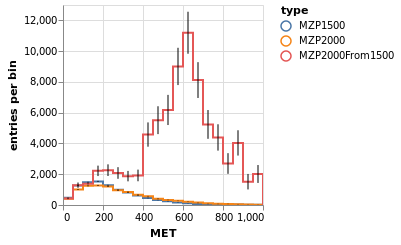

In [18]:
variable = 'TruthMET_met'
histogram = Hist(bin("MET", 20, 0, 1000), groupby('type'), weight="w")
histogram.fill(MET=arr_MZp1p5[variable]*0.001, type="MZP1500", w=np.ones(10000))
histogram.fill(MET=arr_MZp2p0[variable]*0.001, type="MZP2000", w=np.ones(10000))
histogram.fill(MET=arr_MZp1p5[variable]*0.001, w=weights_MZp1500to2000, type="MZP2000From1500")
histogram.overlay("type").step("MET", error=True)

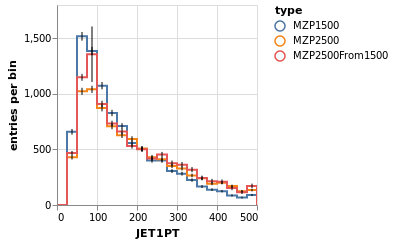

In [19]:
variable = 'LeadingJetPt'
histogram = Hist(bin("JET1PT", 20, 0, 500), groupby('type'), weight="w")
histogram.fill(JET1PT=arr_MZp1p5[variable]*0.001, type="MZP1500", w=np.ones(10000))
histogram.fill(JET1PT=arr_MZp2p5[variable]*0.001, type="MZP2500", w=np.ones(10000))
histogram.fill(JET1PT=arr_MZp1p5[variable]*0.001, w=weights_MZp1500to2500, type="MZP2500From1500")
histogram.overlay("type").step("JET1PT", error=True)

### Reweighting from Z' mass of 1500 GeV to 2500 GeV 
Now we are trying to reweight the sample with Z' mass of 1500 GeV to Z' mass of 2500 GeV.

As above we first plot the **MET** distributions (in GeV) for the 1500 "start" sample, the simulated 2500 "target" sample and the reweighted sample. 

Both in the reweighted **MET** and the reweighted **JETPT1** distributions there are strong differences to the simulated distributions.

In [20]:
weights_MZp1500to2500 = np.array([getSF(m_reweight_MZp_1p5_to_2p5, 'hJet1Pt_SF', value) for value in arr_MZp1p5['LeadingJetPt']*0.001])

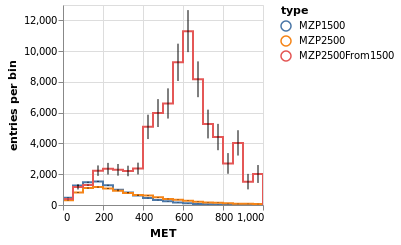

In [21]:
variable = 'TruthMET_met'
histogram = Hist(bin("MET", 20, 0, 1000), groupby('type'), weight="w")
histogram.fill(MET=arr_MZp1p5[variable]*0.001, type="MZP1500", w=np.ones(10000))
histogram.fill(MET=arr_MZp2p5[variable]*0.001, type="MZP2500", w=np.ones(10000))
histogram.fill(MET=arr_MZp1p5[variable]*0.001, w=weights_MZp1500to2500, type="MZP2500From1500")
histogram.overlay("type").step("MET", error=True)

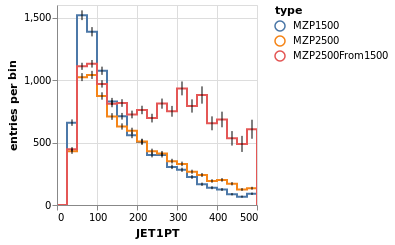

In [22]:
variable = 'LeadingJetPt'
histogram = Hist(bin("JET1PT", 20, 0, 500), groupby('type'), weight="w")
histogram.fill(JET1PT=arr_MZp1p5[variable]*0.001, type="MZP1500", w=np.ones(10000))
histogram.fill(JET1PT=arr_MZp2p5[variable]*0.001, type="MZP2500", w=np.ones(10000))
histogram.fill(JET1PT=arr_MZp1p5[variable]*0.001, w=weights_MZp1500to2500, type="MZP2500From1500")
histogram.overlay("type").step("JET1PT", error=True)

### Reweighting from Z' mass of 2000 GeV to 2500 GeV 
Now we are trying to reweight the sample with Z' mass of 2000 GeV to Z' mass of 2500 GeV.

As above we first plot the **MET** distributions (in GeV) for the 2000 "start" sample, the simulated 2500 "target" sample and the reweighted sample. 

Both in the reweighted **MET** and the reweighted **JETPT1** distributions there are strong differences to the simulated distributions.

In [23]:
weights_MZp2000to2500 = np.array([getSF(m_reweight_MZp_2p0_to_2p5, 'hJet1Pt_SF', value) for value in arr_MZp2p0['LeadingJetPt']*0.001])

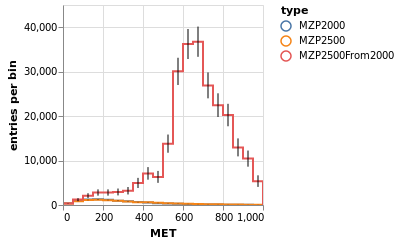

In [24]:
variable = 'TruthMET_met'
histogram = Hist(bin("MET", 20, 0, 1000), groupby('type'), weight="w")
histogram.fill(MET=arr_MZp2p0[variable]*0.001, type="MZP2000", w=np.ones(10000))
histogram.fill(MET=arr_MZp2p5[variable]*0.001, type="MZP2500", w=np.ones(10000))
histogram.fill(MET=arr_MZp2p0[variable]*0.001, w=weights_MZp2000to2500, type="MZP2500From2000")
histogram.overlay("type").step("MET", error=True)

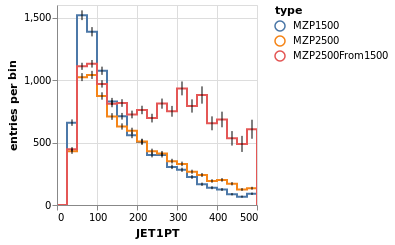

In [25]:
variable = 'LeadingJetPt'
histogram = Hist(bin("JET1PT", 20, 0, 500), groupby('type'), weight="w")
histogram.fill(JET1PT=arr_MZp1p5[variable]*0.001, type="MZP1500", w=np.ones(10000))
histogram.fill(JET1PT=arr_MZp2p5[variable]*0.001, type="MZP2500", w=np.ones(10000))
histogram.fill(JET1PT=arr_MZp1p5[variable]*0.001, w=weights_MZp1500to2500, type="MZP2500From1500")
histogram.overlay("type").step("JET1PT", error=True)

## Conclusion

On particle level the MET-based reweighting looks promising, based on this limited exploratory study.
The leading jet-pt reweighting seems problematic.

Next steps:

1. Try out 2-D reweighting in leading jet pt and MET
2. Check reweighting with more variables (jet multiplicity, angular distributions like dPhi(W,W), ...)
3. Improve implementation of re-weighting in framework and check with simulated + reconstructed samples.